# Відкриті дані по захворюваності на COVID-19 в Україні


## Фільтрація даних за допомогою віджета
[Джерело даних](https://github.com/VasiaPiven/covid19_ua), [документація](https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916)

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Dropdown(options=('оберіть область', 'Івано-Франківська', 'Волинська', 'Вінницька', 'Дніпропетровська', 'Донец…

,Дата,Область,Місце,Підозр,Підтверджено,Померло,Одужало
12079,2021-04-08,Полтавська,Багачка Перша,3,2,0,2
12080,2021-04-08,Полтавська,Байрак,5,5,0,3
12081,2021-04-08,Полтавська,Балаклія,14,13,1,10
12082,2021-04-08,Полтавська,Балюки,5,3,0,3
12083,2021-04-08,Полтавська,Бехтерщина,5,5,0,4
...,...,...,...,...,...,...,...
13361,2020-11-30,Полтавська,Чорнобаї,1,1,1,0
13362,2021-01-21,Полтавська,Шарлаївка,2,1,0,1
13363,2021-01-22,Полтавська,Шафранівка,2,2,0,2
13364,2021-04-08,Полтавська,Шишаки,328,310,3,275


Всього підтверджено: 	60521
Всього померло : 	1276
Всього одужало: 	49936


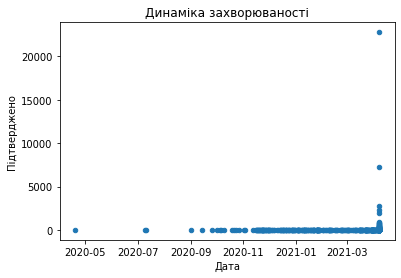

In [2]:
# імпорт бібліотек
import pandas as pd
import numpy as np
import ipywidgets as widgets
import matplotlib.pyplot as plt

# посилання на джерело даних
url = "https://raw.githubusercontent.com/VasiaPiven/covid19_ua/master/covid19_by_settlement_actual.csv"

# нам потрібні лише окремі поля
fields = ['zvit_date', 'registration_area', 'registration_settlement', 'total_susp',	'total_confirm',	'total_death',	'total_recover']

# ми перейменуємо їх 
field_names = ['Дата', 'Область', 'Місце', 'Підозр', 'Підтверджено',	'Померло',	'Одужало']

# читаємо дані
cov_ukraine = pd.read_csv(url, skipinitialspace=True, usecols=fields, header=0)

# додаємо наші нові назви полів
cov_ukraine.columns = field_names

# cov_ukraine.set_index(keys='Дата', inplace=True)

cov_ukraine['Дата'] =  pd.to_datetime(cov_ukraine['Дата'])

# cov_ukraine

# додаємо до спадного списку новий елемент
ALL = 'оберіть область'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique

# задаємо набір елементів спадного списку
dropdown_area = widgets.Dropdown(options = unique_sorted_values_plus_ALL(cov_ukraine['Область']))

# обробка події вибору елемента
def dropdown_area_eventhandler(change):
    if (change.new == ALL):
        display(cov_ukraine)
    else:
        display(cov_ukraine[cov_ukraine['Область'] == change.new])
        # виводимо загальну кількість підтверджених випадків, померлих та тих хто одужав
        all_confirmed = cov_ukraine.loc[cov_ukraine['Область'] == change.new, 'Підтверджено'].sum()
        all_dead = cov_ukraine.loc[cov_ukraine['Область'] == change.new, 'Померло'].sum()
        all_ok = cov_ukraine.loc[cov_ukraine['Область'] == change.new, 'Одужало'].sum()
        print(f"Всього підтверджено: \t{all_confirmed}\nВсього померло : \t{all_dead}\nВсього одужало: \t{all_ok}")
        
        # виводимо графік
        cov_ukraine.loc[cov_ukraine['Область'] == change.new].plot(x='Дата', y='Підтверджено', kind='scatter')
        plt.title("Динаміка захворюваності")
        plt.show()

# прикріпляємо обробник
dropdown_area.observe(dropdown_area_eventhandler, names='value')

# відображаємо список
display(dropdown_area)

## Інтерактивне керування
Детальніше читайте [тут](https://medium.com/nuances-of-programming/%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%B2%D0%BD%D0%BE%D0%B5-%D1%83%D0%BF%D1%80%D0%B0%D0%B2%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5-%D0%B2-jupyter-notebooks-4fd1fccb5788)

In [26]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
# імпорт бібліотек
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

# функція для фільтрації, яку буде автоматично перетворена на віджет
@interact
def show_area(column='Область', x=unique_sorted_values_plus_ALL(cov_ukraine['Область'])):
    return cov_ukraine.loc[cov_ukraine[column] == x]



interactive(children=(Text(value='Область', description='column'), Dropdown(description='x', options=('оберіть…

## Офіційна статистика від Національної служби здоров'я України

Демонстрація відображення iframe всередині блокнота

In [ ]:
# встановлюємо потрібний пакет
!pip install IPython

In [ ]:
# імпорт бібліотек
from IPython.display import IFrame

# відображаємо веб-контент в iframe
IFrame('https://app.powerbi.com/view?r=eyJrIjoiN2M1MTY1MDktZTY5Mi00OTE0LWFiMDAtMjM4NTY0YWU2MmI3IiwidCI6IjI4OGJmYmNmLTVhYjItNDk2MS04YTM5LTg2MDYxYWFhY2Q4NiIsImMiOjl9&amp;fbclid=IwAR3vOXvEK0l3SaGSAxZGgNyc4cNSi17wegJwcFX4oPefbVgUR16RsWDxGjg', width=1000, height=760)